In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('processed_turkish_house_sales.csv')
print(data.shape)

for col in data.columns:                                                  # Observing The Data
    print(data[col].dtype)

(15276, 8)
object
float64
object
object
object
object
object
int64


In [3]:
data['Area_sqm'] = data['Metrekare']                                      # Same Column with English Name


## Extracting the room count from the 'Oda_Sayisi' column
def extract_room_count(val):
    try:
        # Taking the first number in the string
        return int(float(val.split('+')[0]))
    except Exception as e:
        return np.nan

data['Room_count'] = data['Oda_Sayisi'].apply(extract_room_count)

# Fill any possible NaN in Room_count with the mode
data['Room_count'] = data['Room_count'].fillna(data['Room_count'].mode()[0])
print('Unique values in Room_count:', data['Room_count'].unique())


data['Price(TRY)'] = data['fiyat']                                       # Same Column with English Name

data['log(Price(TRY))'] = np.log(data['fiyat'])                          # Using log(y) as a target variable to decrease skewness of the data

print(data.shape)
print(data.columns)

Unique values in Room_count: [3. 2. 6. 5. 1. 4. 7. 8.]
(15276, 12)
Index(['satici_tip', 'Metrekare', 'Oda_Sayisi', 'il', 'Ilce', 'Mahalle',
       'Tarih', 'fiyat', 'Area_sqm', 'Room_count', 'Price(TRY)',
       'log(Price(TRY))'],
      dtype='object')


In [4]:
# Features and Target selection
features = ['Area_sqm', 'Room_count','il', 'Ilce', 'Mahalle']
target = ['log(Price(TRY))']

X = data[features]
y = data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)

# But still we have,
# Our location data --> data[['il','Ilce','Mahalle']] in object/(non-numerical) type

In [5]:
def frequency_encode(train, test, column_name):
    
    freq_map = train[column_name].value_counts()
    
    train[column_name + '_freq_encoded'] = train[column_name].map(freq_map)
    test[column_name + '_freq_encoded'] = test[column_name].map(freq_map)
    test[column_name + '_freq_encoded'] = test[column_name + '_freq_encoded'].fillna(0)
    
    # Drop original column
    train.drop(columns=[column_name], inplace=True)
    test.drop(columns=[column_name], inplace=True)
    
    return train, test

# Conversion of object/categorical type of data with frequency encoding.
X_train,X_test = frequency_encode(X_train,X_test,"il")
X_train,X_test = frequency_encode(X_train,X_test,"Ilce")
X_train,X_test = frequency_encode(X_train,X_test,"Mahalle")

In [6]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {MSE}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.2230992892224712
R^2 Score: 0.29365104741543324


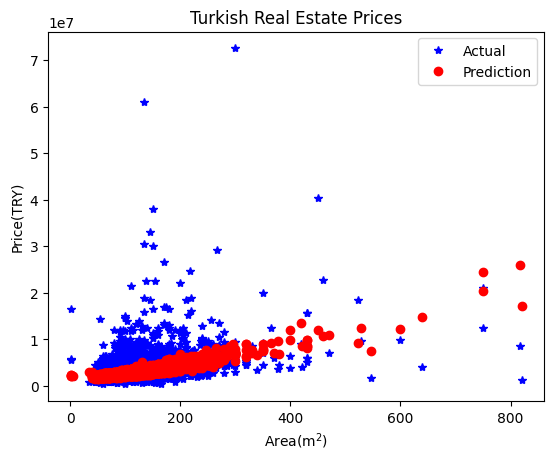

In [7]:
#Plotting y_test and y_pred with Area
plt.plot(X_test['Area_sqm'],np.exp(y_test),"b *",label = "Actual",alpha = 1)
plt.plot(X_test['Area_sqm'],np.exp(y_pred),"r o",label = "Prediction",alpha = 1)
plt.xlabel('Area(m$^2$)')
plt.ylabel('Price(TRY)')
plt.title('Turkish Real Estate Prices')
plt.legend()
plt.show()